# Sample Size ($n$) and Correlation ($\hat{\rho}$)

**Summary**: This notebook illustrates the relationship between sample size ($n$), correlation ($\hat{\rho}$), and its standard error by generating data from a multivariate normal distribution with a fixed center, spread, and correlation matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## I. Sample Size and Correlation
To demonstrate how the **correlation ($\hat{\rho}$)** is influenced by changes in sample size, we'll compare how the *value* of $\hat{\rho}$ differs between smaller and larger sample sizes.

In [52]:
def generate_rho(n, num_samples=400, mean=[0, 0], rho=0.5):
    '''Generates 400 random multivariate normal distributions with a sample size of n. 

    Args:
        n (int)           -- sample size of each multivariate normal distribution
        
    Keyword Args:
        num_samples (int) -- number of samples generated
        mean (list)       -- coordinate of population mean
        rho (float)       -- population value of cor(X1, X2)
    
    Returns:
    (list) each sample correlation value
    '''
    cov = [
        [1, rho],
        [rho, 1]
    ]
    
    rho_hats = [0] * num_samples
    for i in range(num_samples):
        X = np.random.multivariate_normal(mean, cov, size=n)
        X_cov = (X.T@X)/n
        rho = X_cov[0][1]
        rho_hats[i] = rho
    
    return rho_hats

In [82]:
num_samples = 49
rho_hats = [0] * 49

i = 0
for n in range(100, 5_000, 100):
    rho = generate_rho(n)
    rho_hats[i] = np.std(rho)
    i += 1

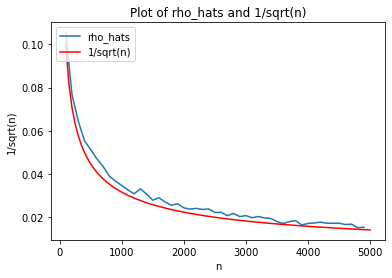

In [86]:
plt.plot(range(100, 5_000, 100), rho_hats, label='rho_hats')

ax = plt.gca()
n_values = np.linspace(100, 5000, 100)
y_values = 1 / np.sqrt(n_values)

# plots 1/sqrt(n) on the second y-axis
ax.plot(n_values, y_values, color='red', linestyle='-', label='1/sqrt(n)')

plt.xlabel('n')
plt.ylabel('rho_hats')
ax.set_ylabel('1/sqrt(n)')
plt.title('Plot of rho_hats and 1/sqrt(n)')
plt.legend(loc='upper left')

## II. Sample Size and Standard Error of Correlation
To demonstrate how the **standard error of correlation ($\hat{\rho}$)** is influenced by changes in sample size, we'll compare how the *variability* of $\hat{\rho}$ differs between smaller and larger sample sizes.

### Step 1: Generating Samples

In [16]:
# generates 400 random multivariate normal distributions with a sample size of n=100
small_n = 100
small_sample_rho = generate_rho(small_n)

# generates 400 random multivariate normal distributions with a sample size of n=10_000
big_n = 10_000
big_sample_rho = generate_rho(big_n)

### Step 2: Comparing $\hat{\rho}$ between Smaller (n=100) and Larger (n=10,000) Samples

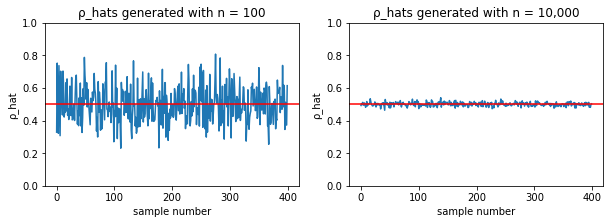

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(small_sample_rho)
axes[0].set(xlabel ='sample number', ylabel = '\u03C1_hat', title ='\u03C1_hats generated with n = 100')
axes[0].set_ylim(0,1)
axes[0].axhline(y=0.5, color='r', linestyle='-', label='\u03C1')

axes[1].plot(big_sample_rho)
axes[1].set(xlabel ='sample number', ylabel = '\u03C1_hat', title ='\u03C1_hats generated with n = 10,000')
axes[1].set_ylim(0,1)
axes[1].axhline(y=0.5, color='r', linestyle='-', label='\u03C1')

In [40]:
print(f"SE(Correlation) of smaller sample (n={small_n}):  {np.std(small_sample_rho) / np.sqrt(400)}")
print(f"SE(Correlation) of bigger sample (n={big_n}): {np.std(big_sample_rho) / np.sqrt(400)}")

SE(Correlation) of smaller sample (n=100):  0.0055220906371945535
SE(Correlation) of bigger sample (n=10000): 0.0005847774922965873


The standard error of the sample correlation between x1 and x2 is about 100 times smaller for the samples with 10,000 data points when compared to the samples with 100 data points. We can also see this in the graphs depicted above, where there is much less variability in $\hat{\rho}$ around the population $\rho$ for the larger samples.